In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
%matplotlib inline


In [2]:
input_layer_size  = 400
num_labels = 10
data = loadmat(os.path.join('ex3data1.mat'))
X, y = data['X'], data['y'].ravel()
y[y == 10] = 0
m = y.size

In [3]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')


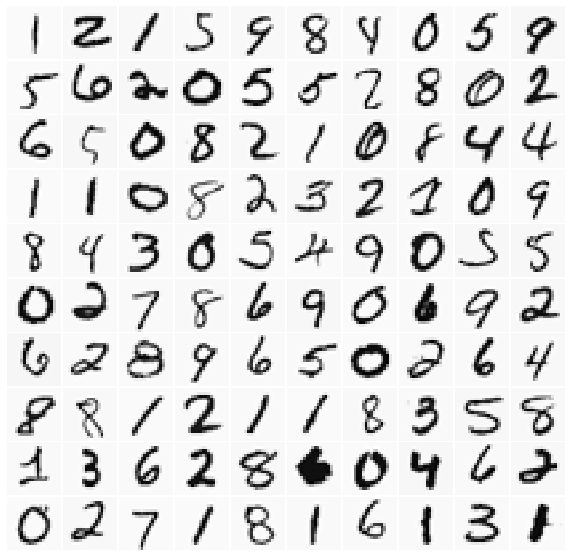

In [4]:
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
displayData(sel)

In [5]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1/(1 + np.exp(z*(-1)))
    return g

In [6]:
theta_t = np.array([-2, -1, 1, 2], dtype=float)
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3



In [7]:
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    n = theta.size
    if y.dtype == bool:
        y = y.astype(int)
    J = 0
    print(theta.shape)
    grad = np.zeros(theta.shape)
    J = np.sum(np.transpose(np.log(sigmoid(X.dot(theta)))).dot(y) + np.transpose(np.log(1 - sigmoid(X.dot(theta)))).dot(1-y))*(-1)/m
    thetasq = theta*theta
    thetasq[0] = 0
    J = J + np.sum(thetasq)*lambda_/(2*m)
    
    grad[0] = np.transpose(sigmoid(X.dot(theta)) - y).dot(X[:,0])/m
    for i in range (1,n):
        grad[i] = np.transpose(sigmoid(X.dot(theta)) - y).dot(X[:,i])/m + lambda_*theta[i]/m
    return J, grad


In [8]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Cost         : {:.6f}'.format(J))
print('Expected cost: 2.534819')
print('-----------------------')
print('Gradients:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');


(4,)
Cost         : 2.534819
Expected cost: 2.534819
-----------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [9]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    initial_theta = np.zeros(n+1)
    for c in range (num_labels):
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='TNC',
                                options=options)
        all_theta[c] = res.x
    return all_theta


In [10]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)


(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)
(401,)

In [11]:
def predictOneVsAll(all_theta, X):
    print(all_theta.shape)
    print(X.shape)
    m = X.shape[0];
    num_labels = all_theta.shape[0]
    p = np.zeros(m)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    h = sigmoid(X.dot(np.transpose(all_theta)))
    for i in range (m):
        p = np.argmax(h, axis = 1)
    print(p)
    return p

In [12]:
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y) * 100))


(10, 401)
(5000, 400)
[0 0 0 ... 9 9 7]
Training Set Accuracy: 95.28%
